
# 1D Kalman Filter 

## Problem Setup
- True object moves in **1D**
- We receive **noisy position measurements**
- Goal: **estimate the true position over time** using a Kalman Filter



## Imports
We use:
- **NumPy** for numerical and matrix operations
- **Matplotlib** for visualization


In [7]:
import numpy as np
import matplotlib.pyplot as plt

## Simulation Parameters
We simulate an object moving with **constant velocity** in 1D.

In [8]:
np.random.seed(42)  # for reproducibility
n_steps = 50        # number of time steps
#true_velocity = 1  # constant velocity
dt = 1.0           # time step

## Generate True State and Noisy Measurements
- `true_positions/velocities` → ground truth (unknown in real life)
- `measurements` → noisy sensor readings

In [9]:
true_positions = []
true_velocities = []
measurements = []
position = 0.0
velocity= 1.0
measurement_noise_std = 2.0  # sensor noise (R)
acceleration_noise_std = 0.3  # random acceleration noise
for _ in range(n_steps):
    position += velocity * dt
    true_positions.append(position)
    noisy_measurement = position + np.random.normal(0, measurement_noise_std)
    measurements.append(noisy_measurement)
    true_velocities.append(velocity)
    # Simulate small random acceleration changes
    velocity += np.random.normal(0, acceleration_noise_std)* dt


## Kalman Filter Initialization
We initialize:
- State estimate
- Uncertainty
- Model matrices
- Noise values

In [10]:
# Initial state estimate (position only)
x_est = np.array([[0.0],  # initial position guess
                  [1.0]])  # initial velocity guess

# Initial uncertainty
P = np.array([[10.0, 0.0],
              [0.0, 5.0]])    # large value = low confidence

# State transition matrix
F = np.array([[1.0, dt],
              [0.0, 1.0]])

# Measurement matrix (we only measure position)
H = np.array([[1.0, 0.0]])

# Process noise (model uncertainty)
Q = np.array([[0.1, 0.0],
              [0.0, 0.05]])

# Measurement noise (sensor uncertainty)
R = np.array([[measurement_noise_std ** 2]])

## Kalman Filter Loop
Each iteration performs:
1. Prediction
2. Update

In [11]:
estimates_extended = []
prediction_only = []  # Store prediction-only estimates
velocities_estimated = []  # Store estimated velocities

for z in measurements:
    # ------------------
    # PREDICTION STEP
    # ------------------
    x_pred = F @ x_est
    P_pred = F @ P @ F.T + Q
    
    # Store prediction-only estimate (before update)
    prediction_only.append(x_pred[0, 0])
    
    # ------------------
    # UPDATE STEP
    # ------------------
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)
    
    y = np.array([[z]]) - H @ x_pred  # innovation
    x_est = x_pred + K @ y
    
    P = (np.eye(2) - K @ H) @ P_pred
    
    estimates_extended.append(x_est[0, 0])
    velocities_estimated.append(x_est[1, 0])

## Visualization 
You should observe:
- Noisy measurements
- Smooth Kalman estimate
- Estimate closely following true position

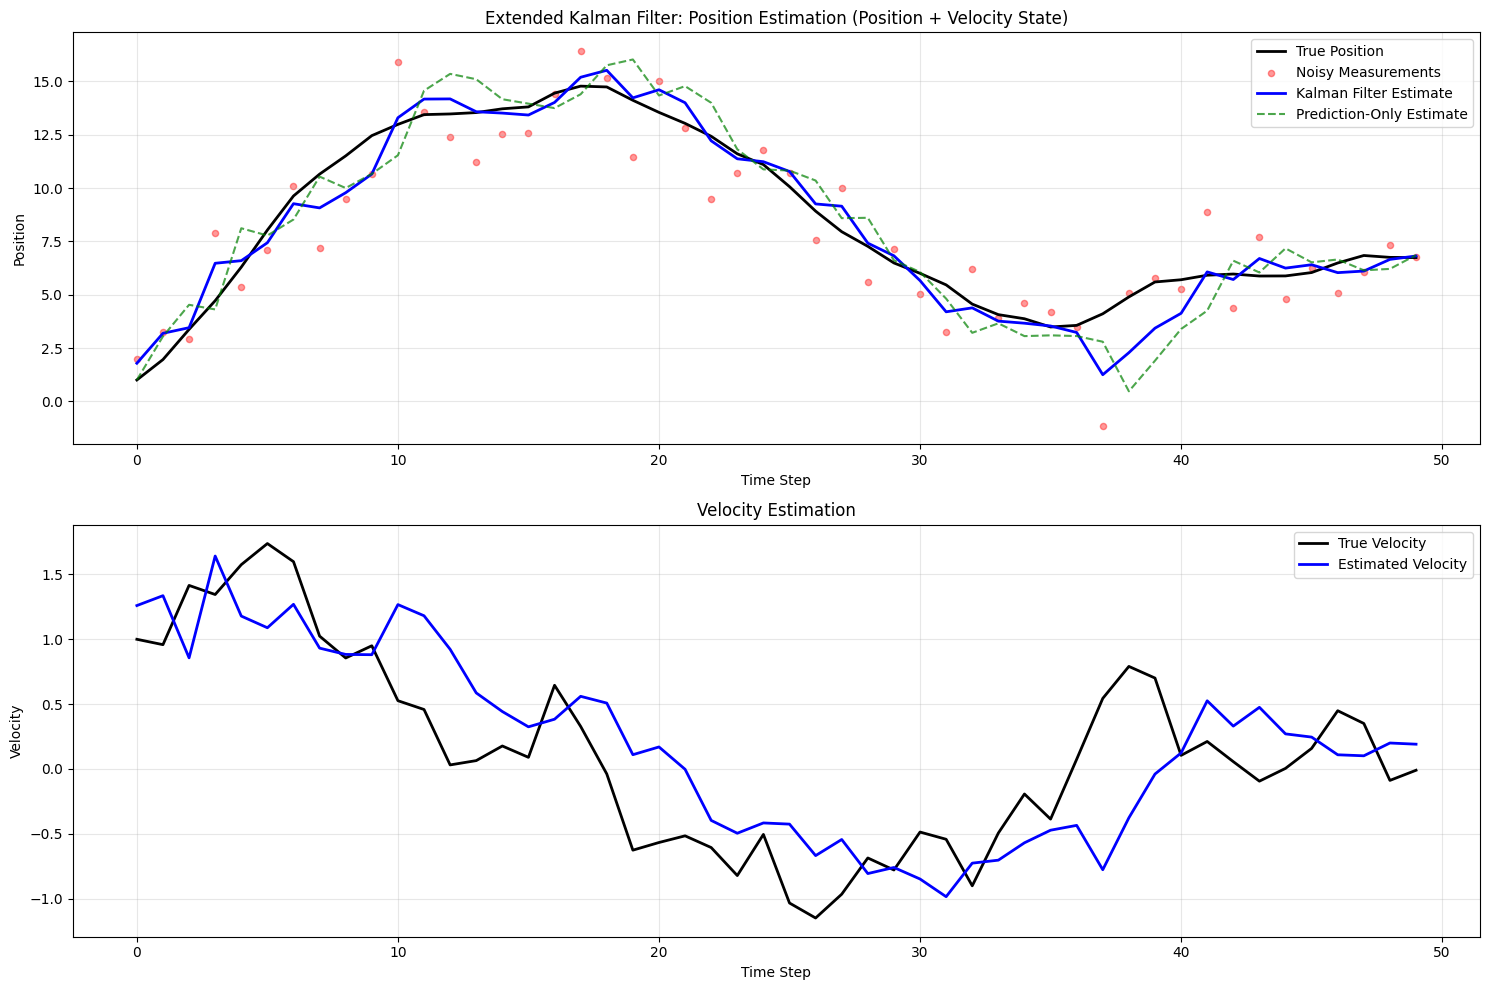

In [12]:
# Visualization of Extended Kalman Filter
plt.figure(figsize=(15, 10))

# Plot 1: Position tracking
plt.subplot(2, 1, 1)
plt.plot(true_positions, label="True Position", linewidth=2, color='black')
plt.scatter(range(n_steps), measurements, label="Noisy Measurements", 
            color="red", alpha=0.4, s=20)
plt.plot(estimates_extended, label="Kalman Filter Estimate", linewidth=2, color='blue')
plt.plot(prediction_only, label="Prediction-Only Estimate", linewidth=1.5, 
         color='green', linestyle='--', alpha=0.7)
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.title("Extended Kalman Filter: Position Estimation (Position + Velocity State)")
plt.legend()
plt.grid(True, alpha=0.3)

# Plot 2: Velocity tracking
plt.subplot(2, 1, 2)
plt.plot(true_velocities, label="True Velocity", linewidth=2, color='black')
plt.plot(velocities_estimated, label="Estimated Velocity", linewidth=2, color='blue')
plt.xlabel("Time Step")
plt.ylabel("Velocity")
plt.title("Velocity Estimation")
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()